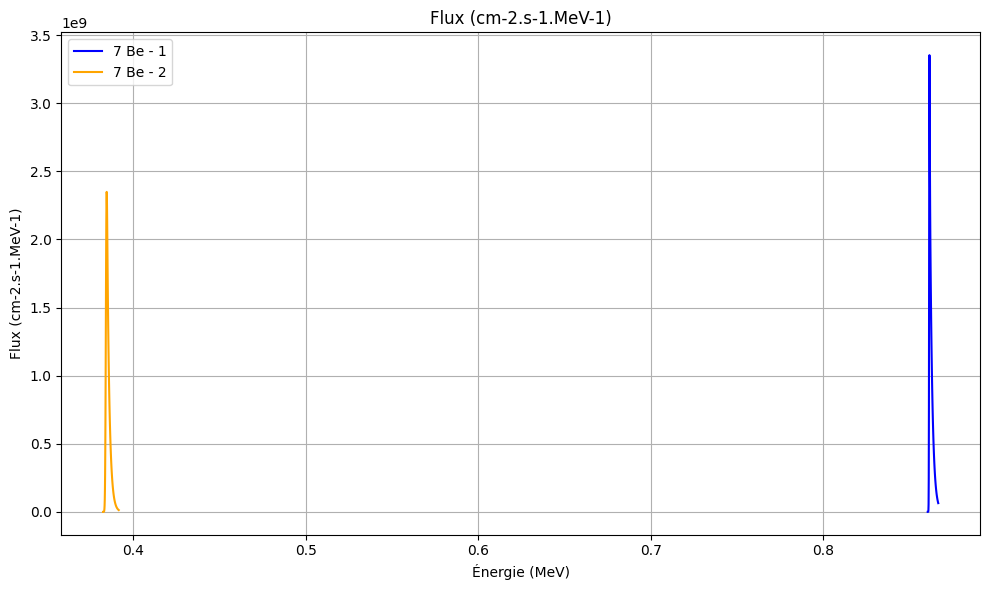

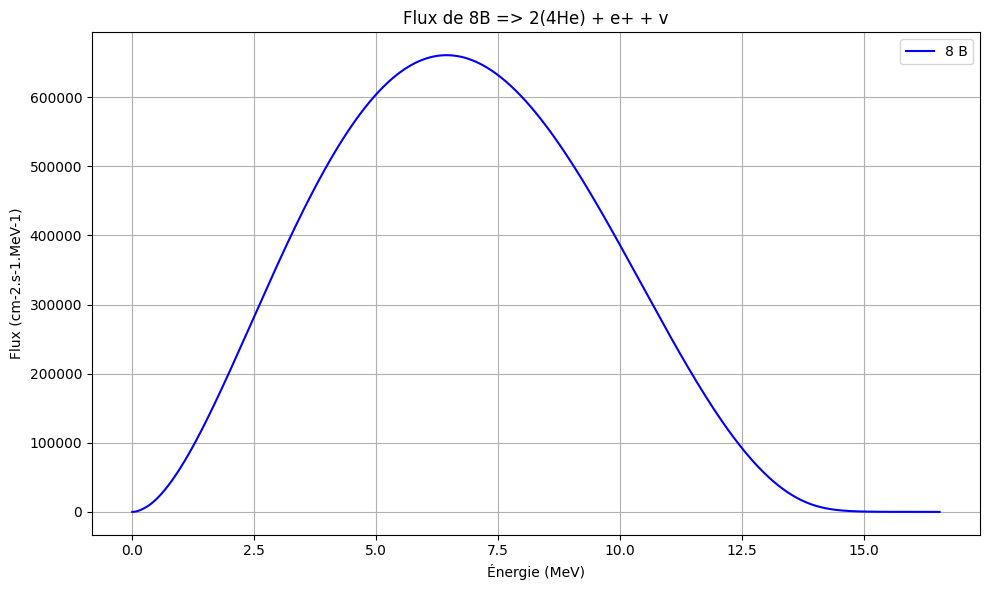

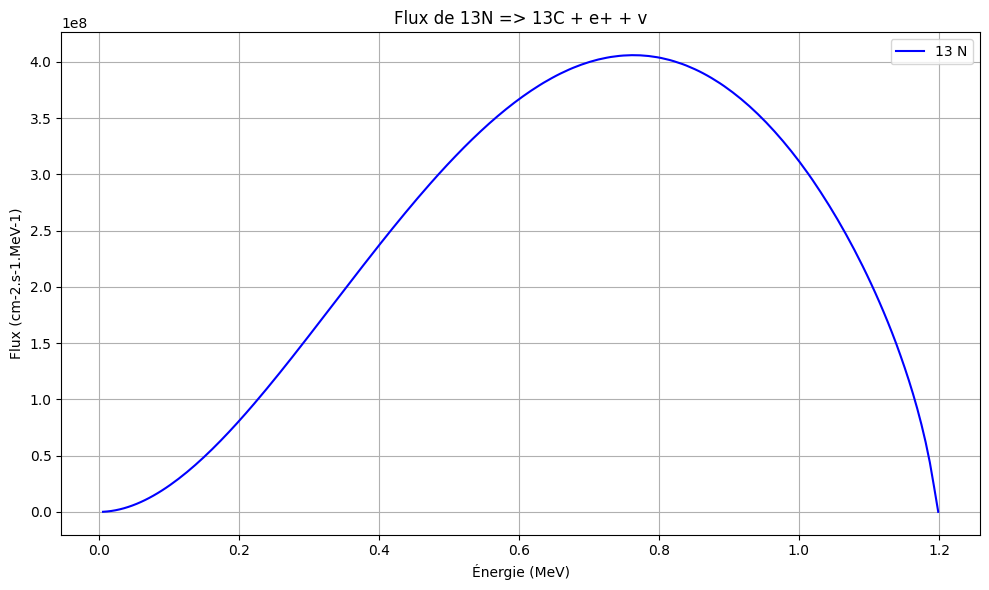

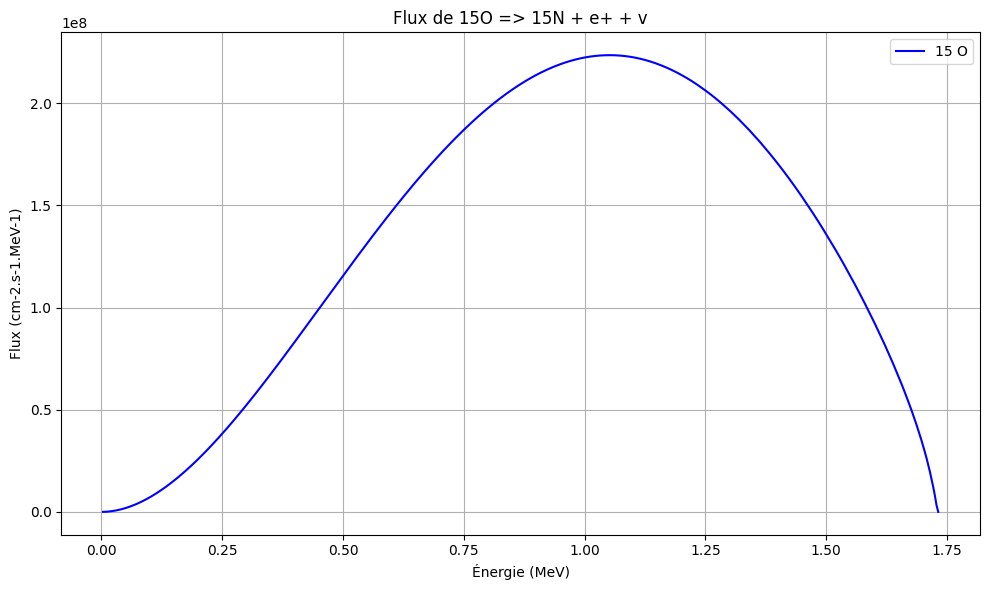

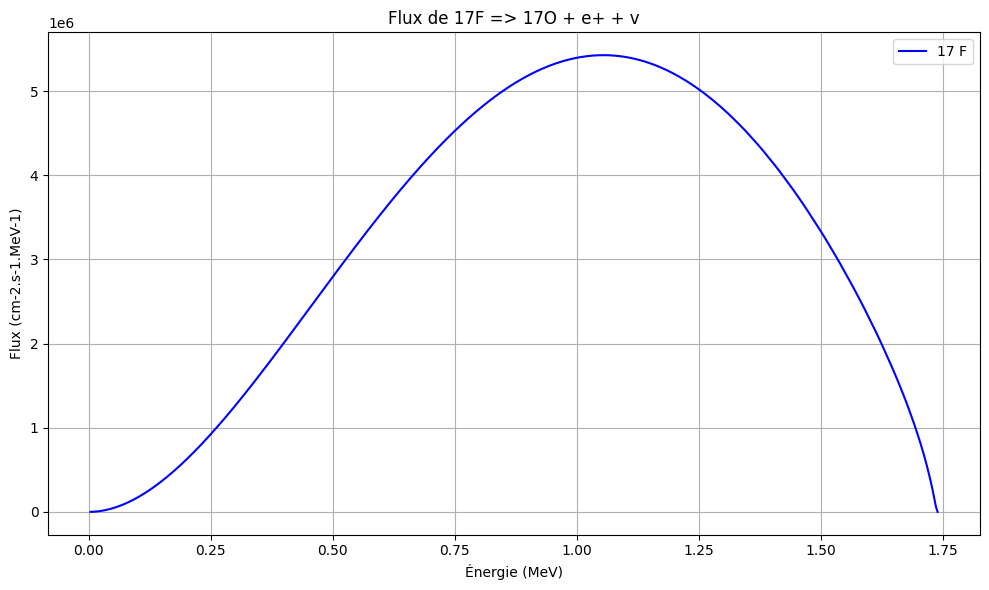

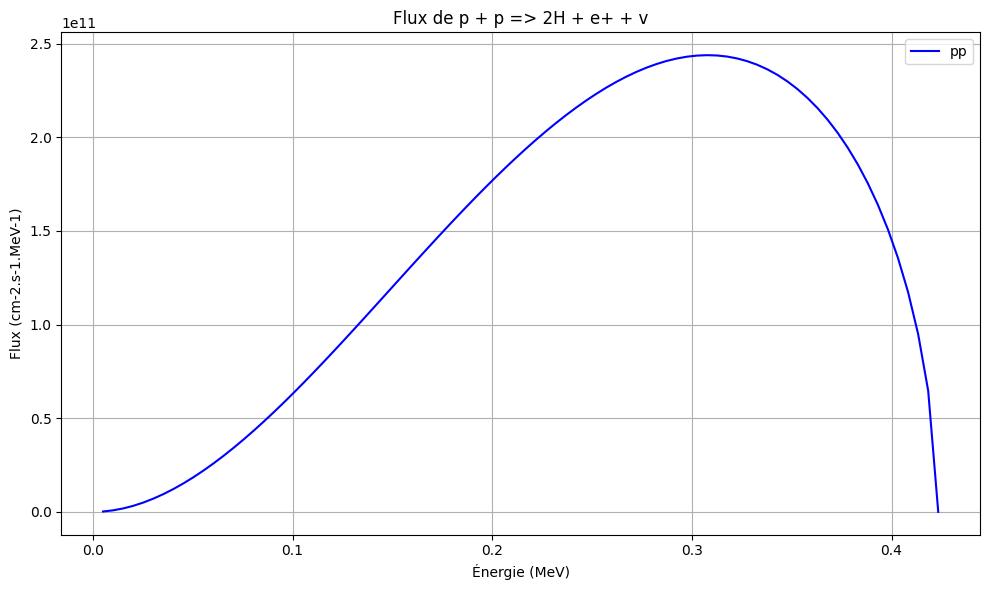

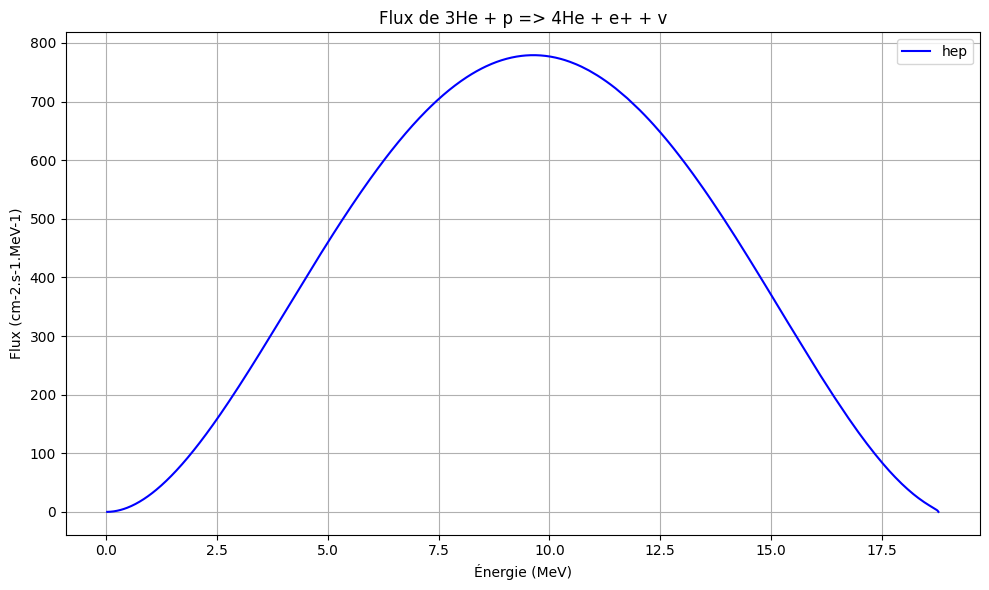

1000


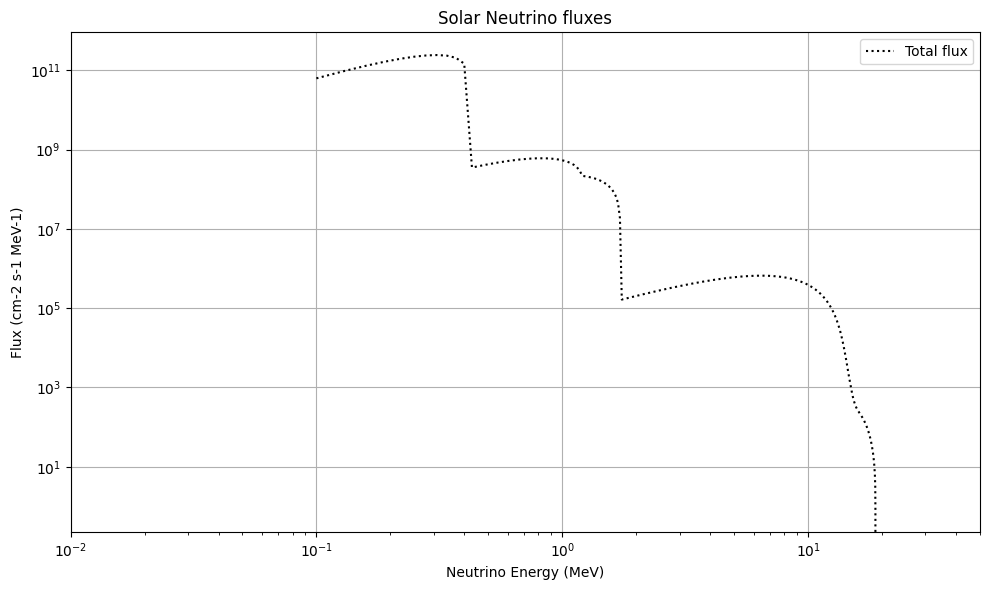

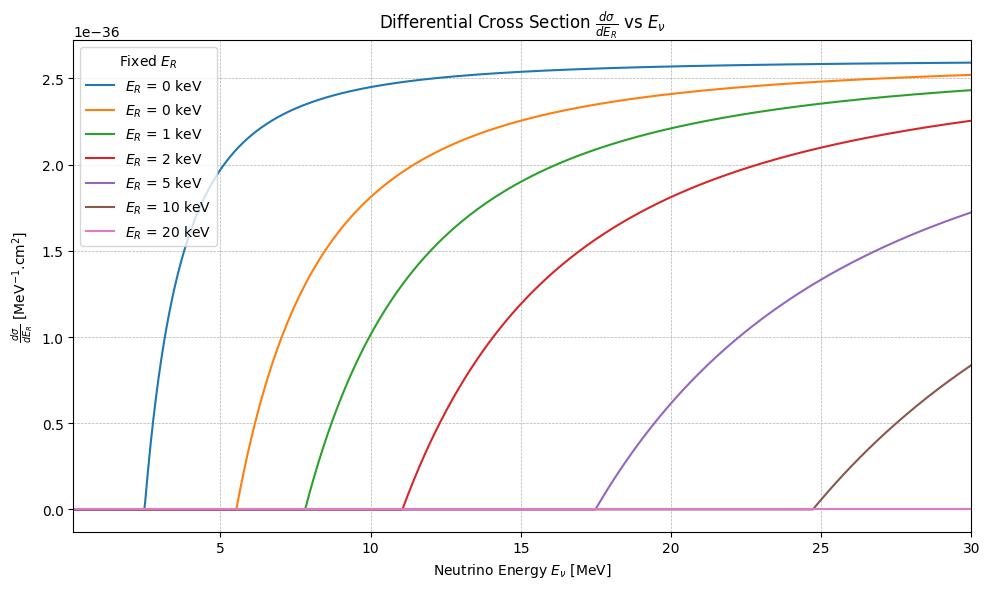

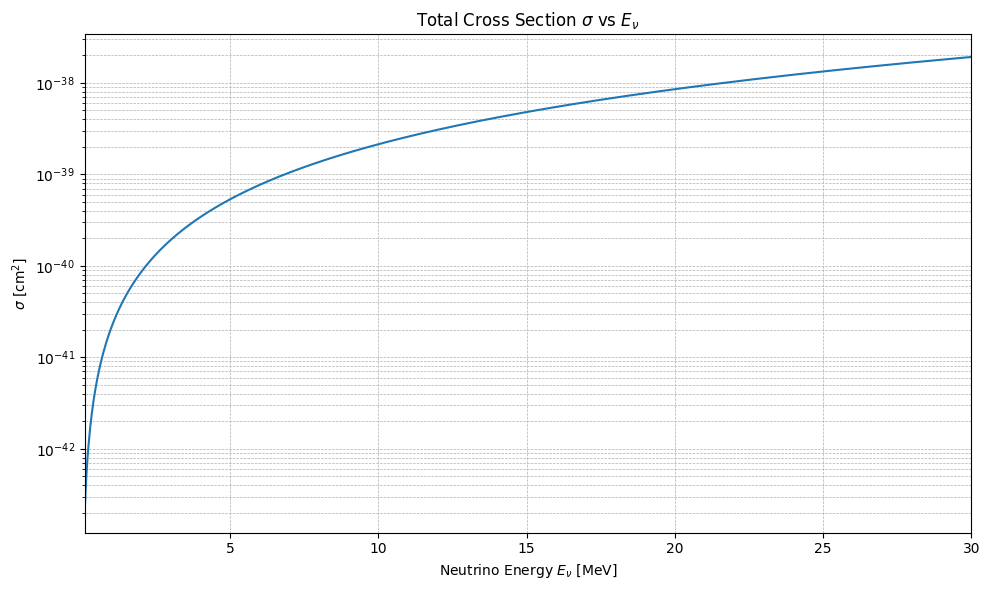

In [1]:
import pandas as pd

%run ../week1/SolarNeutrinoFlux.ipynb
%run ../week1/CrossSection.ipynb

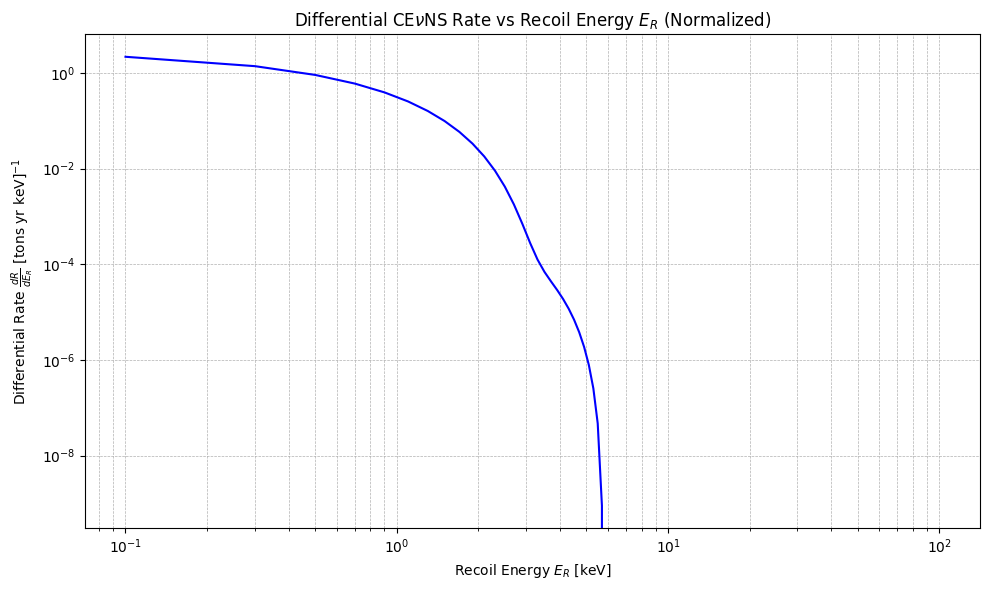

In [2]:
# Constants
N_A = 6.022e23
M_Xe = 131.29  # g/mol
N = N_A / (M_Xe * 1e-6) #tons-1

# lists
E_v = np.linspace(0.1, 30, 1000)  # MeV
E_R = np.linspace(0.1, 100, 500)  # keV
E_R_MeV = E_R * 1e-3  # E_R in MeV to calculate dsigma


# Computing dR/dER
dRdER = []

for Er in E_R_MeV:

    Ev_min = np.sqrt(m_A * Er / 2)
    Ev_valid = []
    flux_valid = []

    for i in range(len(E_v)):
        if E_v[i] >= Ev_min:
            Ev_valid.append(E_v[i])
            flux_valid.append(total_flux[i])

    Ev_valid = np.array(Ev_valid)
    flux_valid = np.array(flux_valid)

    dsigmadEr = ((G_F**2 * m_A) / (4 * np.pi)) * Q_V**2 * (1 - (m_A * Er) / (2 * Ev_valid**2))

    integrand = flux_valid * dsigmadEr * 3.154e7 #To get years
    
    rate = N * trapezoid(integrand, Ev_valid)
    dRdER.append(rate)

Norm = trapezoid(dRdER, E_R)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(E_R, dRdER/Norm, color='blue')  # E_R in keV
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Recoil Energy $E_R$ [keV]")
plt.ylabel(r"Differential Rate $\frac{dR}{dE_R}$ [tons yr keV]$^{-1}$")
plt.title("Differential CE$\u03bd$NS Rate vs Recoil Energy $E_R$ (Normalized)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()